## Preparation

In [1]:
from os import listdir
from os.path import isfile, join
import os
import os
os.chdir("/home/seleythen/Pobrane")
import re
import pandas
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing
onlyfiles = [f for f in listdir(os.getcwd()) if isfile(join(os.getcwd(), f))]

In [2]:
def reader_fos(fileName):
    df = pandas.read_json(fileName, lines=True)
    fos_authors_and_year = df[["id", "year", "authors", "fos", "references"]]
    filtered_years = fos_authors_and_year.loc[fos_authors_and_year["year"] > 2010]
    filtered_years = filtered_years.loc[filtered_years["year"] < 2018]
    return filtered_years

In [3]:
dblp_part_regex = re.compile("author_indexed_fos*")
part_files_filter_obj = filter(lambda file_name: dblp_part_regex.match(file_name), onlyfiles)
part_files = list(part_files_filter_obj)

In [4]:
list_of_dataframes = list(map(reader_fos, part_files))
df = pandas.concat(list_of_dataframes, ignore_index=True)

In [5]:
filtered_years = df.loc[df["year"] > 2010]
filtered_years = filtered_years.loc[df["year"] < 2018]
filtered_years

,id,year,authors,fos,references
0,1996175362,2012.0,"[{'index': 193842}, {'index': 193843}, {'index...","[{'name': '96', 'w': 0.45922613100000004}, {'n...",[1965408437]
1,1996175365,2014.0,"[{'index': 367061}, {'index': 209885}, {'index...","[{'name': '524', 'w': 0.45862042900000005}, {'...","[1511827303, 1541708852, 1585487023, 179158766..."
2,1996175602,2015.0,"[{'index': 276446}, {'index': 196814}, {'index...","[{'name': '17372', 'w': 0.44420751900000005}, ...","[306660194, 1782903374, 1882088395, 1989274697..."
3,1996175642,2011.0,"[{'index': 758}, {'index': 43243}, {'index': 5...","[{'name': '7222', 'w': 0.4367316}, {'name': '1...","[2026759935, 2162908184]"
4,1996176291,2013.0,"[{'index': 516371}, {'index': 516372}, {'index...","[{'name': '419', 'w': 0.45580807300000004}, {'...","[1978033128, 2087034597, 2116101591, 214785302..."
...,...,...,...,...,...
1777235,96295004,2013.0,"[{'index': 250615}, {'index': 369275}, {'index...","[{'name': '443', 'w': 0.5813411470000001}, {'n...",[35111916]
1777236,962972029,2015.0,"[{'index': 278830}, {'index': 369278}]","[{'name': '524', 'w': 0.44933956900000005}, {'...","[2028419480, 2069541868, 2086673082, 209617849..."
1777237,963004418,2015.0,"[{'index': 350317}, {'index': 350318}, {'index...","[{'name': '485', 'w': 0.40057099999999995}, {'...","[8830101, 2182919690]"
1777238,96301023,2014.0,"[{'index': 212342}, {'index': 2323}, {'index':...","[{'name': '1214', 'w': 0.48527339999999997}, {...","[1525018799, 1779843715, 1803485664, 196839275..."


In [6]:
len(filtered_years)

1777240

In [146]:
def get_authors_ids(references_list):
    authors = []
    if not isinstance(references_list, list) and pandas.isna(references_list):
        return []
    for reference_id in references_list:
        reference_authors = list(df.loc[df["id"] == int(reference_id)]["authors"])
        if len(reference_authors):
            authors.extend(list(map(lambda x: x["index"], reference_authors[0])))
    return list(set(authors))

In [147]:
filtered_slice["references"].apply(get_authors_ids)

[[{'index': 1517315}, {'index': 568107}, {'index': 424055}, {'index': 448130}]]
[[{'index': 106791}, {'index': 380086}, {'index': 50135}]]
[[{'index': 518019}, {'index': 509956}, {'index': 518020}, {'index': 35835}]]
[[{'index': 157396}, {'index': 106427}, {'index': 79667}]]
[[{'index': 160743}, {'index': 69474}]]
[[{'index': 509956}]]
[[{'index': 518020}, {'index': 31509}, {'index': 1756954}]]
[[{'index': 100903}, {'index': 5062}, {'index': 5065}, {'index': 24646}]]
[[{'index': 135758}, {'index': 79667}]]
[[{'index': 50135}, {'index': 163617}, {'index': 39286}]]
[[{'index': 2425850}, {'index': 336826}, {'index': 1528816}, {'index': 2425851}]]
[[{'index': 75120}, {'index': 1785137}, {'index': 993309}, {'index': 2860}]]
[[{'index': 495092}, {'index': 22602}]]
[[{'index': 369655}, {'index': 103857}]]
[[{'index': 366622}, {'index': 908828}, {'index': 907796}, {'index': 368985}, {'index': 146436}]]
[[{'index': 993309}, {'index': 75120}]]
[[{'index': 731765}]]
[[{'index': 27288}]]
[[{'index

[[{'index': 167720}, {'index': 2331483}]]
[[{'index': 40619}, {'index': 40615}, {'index': 1930142}]]
[[{'index': 1323520}]]
[[{'index': 1798001}, {'index': 9843}, {'index': 28985}, {'index': 9844}]]
[[{'index': 375026}, {'index': 210159}, {'index': 140194}]]
[[{'index': 375026}, {'index': 210159}, {'index': 140194}]]
[[{'index': 75416}, {'index': 77218}]]
[[{'index': 537420}, {'index': 535021}]]
[[{'index': 1089234}]]
[[{'index': 1318024}, {'index': 1320677}]]
[[{'index': 1713677}, {'index': 723793}, {'index': 1557684}, {'index': 1318024}]]
[[{'index': 537421}, {'index': 535021}]]
[[{'index': 174089}, {'index': 174090}, {'index': 14603}, {'index': 174091}]]
[[{'index': 109397}, {'index': 572367}]]
[[{'index': 966821}, {'index': 195901}]]
[[{'index': 956968}, {'index': 956964}]]
[[{'index': 1081200}, {'index': 328476}, {'index': 450773}]]
[[{'index': 2166108}, {'index': 977380}, {'index': 134457}]]
[[{'index': 1081200}, {'index': 328476}, {'index': 450773}]]
[[{'index': 126362}, {'index

[[{'index': 101341}, {'index': 548002}, {'index': 51231}]]
[[{'index': 826156}, {'index': 344794}]]
[[{'index': 101341}, {'index': 548002}]]
[[{'index': 930498}, {'index': 1051151}, {'index': 341}, {'index': 3893}, {'index': 99900}]]
[[{'index': 610524}, {'index': 51231}]]
[[{'index': 214199}, {'index': 184907}, {'index': 511126}, {'index': 3233}]]
[[{'index': 244725}, {'index': 53280}, {'index': 53279}, {'index': 286523}, {'index': 24435}]]
[[{'index': 1820752}, {'index': 129479}]]
[[{'index': 494504}, {'index': 494505}, {'index': 494506}]]
[[{'index': 62877}, {'index': 62878}, {'index': 50390}]]
[[{'index': 79236}, {'index': 40410}, {'index': 1727540}, {'index': 40411}]]
[[{'index': 689703}, {'index': 2757822}, {'index': 2188782}, {'index': 689701}, {'index': 689702}]]
[[{'index': 996041}, {'index': 58242}, {'index': 56652}, {'index': 300603}]]
[[{'index': 183790}, {'index': 183791}, {'index': 25259}]]
[[{'index': 509183}, {'index': 187396}, {'index': 187397}, {'index': 55803}]]
[[{'

[[{'index': 372259}, {'index': 15574}, {'index': 3841}, {'index': 3843}, {'index': 3845}]]
[[{'index': 1104787}, {'index': 192031}, {'index': 736213}, {'index': 1104788}, {'index': 192034}]]
[[{'index': 15574}, {'index': 3841}, {'index': 3843}, {'index': 975867}, {'index': 3845}]]
[[{'index': 667064}, {'index': 403831}, {'index': 82248}, {'index': 40652}]]
[[{'index': 666099}, {'index': 427530}, {'index': 120904}, {'index': 189142}, {'index': 675079}, {'index': 55599}]]
[[{'index': 88363}]]
[[{'index': 88363}]]
[[{'index': 123602}, {'index': 70467}, {'index': 9881}, {'index': 17986}]]
[[{'index': 123602}, {'index': 70467}, {'index': 9881}, {'index': 17986}]]
[[{'index': 448182}, {'index': 118414}, {'index': 189712}]]
[[{'index': 70467}, {'index': 17986}]]
[[{'index': 517365}, {'index': 517366}]]
[[{'index': 686711}, {'index': 171608}, {'index': 1271320}]]
[[{'index': 48099}, {'index': 1821570}, {'index': 28956}]]
[[{'index': 523402}, {'index': 523403}, {'index': 523404}, {'index': 5234

[[{'index': 161024}, {'index': 569519}, {'index': 1510960}, {'index': 1722137}, {'index': 1722138}, {'index': 228605}]]
[[{'index': 941815}, {'index': 315070}, {'index': 141774}]]
[[{'index': 53280}, {'index': 9811}]]
[[{'index': 386846}, {'index': 6708}, {'index': 389383}]]
[[{'index': 103299}, {'index': 103156}, {'index': 103300}, {'index': 103301}]]
[[{'index': 2398110}, {'index': 2398111}]]
[[{'index': 1726356}, {'index': 1726357}, {'index': 1726358}, {'index': 1726359}]]
[[{'index': 786259}, {'index': 155357}]]
[[{'index': 1937920}, {'index': 142968}, {'index': 1015297}, {'index': 2740167}, {'index': 2740168}, {'index': 15895}, {'index': 388264}]]
[[{'index': 788222}, {'index': 572364}, {'index': 572362}, {'index': 183069}, {'index': 135475}, {'index': 256792}]]
[[{'index': 463275}, {'index': 737292}, {'index': 142971}, {'index': 281301}, {'index': 99249}]]
[[{'index': 33511}, {'index': 33512}, {'index': 33513}, {'index': 33514}]]
[[{'index': 971807}, {'index': 1349}, {'index': 14

[[{'index': 51120}, {'index': 100159}]]
[[{'index': 149721}, {'index': 56879}, {'index': 115997}, {'index': 102238}]]
[[{'index': 907436}, {'index': 185241}, {'index': 49375}]]
[[{'index': 82607}, {'index': 43376}, {'index': 4969}]]
[[{'index': 610524}, {'index': 51231}]]
[[{'index': 108341}, {'index': 164548}, {'index': 197128}]]
[[{'index': 482845}, {'index': 582246}, {'index': 626344}, {'index': 158679}, {'index': 408814}]]
[[{'index': 585083}, {'index': 445683}, {'index': 1369}, {'index': 43376}]]
[[{'index': 610524}, {'index': 51231}]]
[[{'index': 410054}, {'index': 66854}, {'index': 66852}, {'index': 505686}, {'index': 547901}, {'index': 505688}, {'index': 547902}, {'index': 505687}, {'index': 86112}]]
[[{'index': 979996}, {'index': 979997}, {'index': 979998}, {'index': 979999}, {'index': 674586}, {'index': 980000}, {'index': 24951}]]
[[{'index': 716731}, {'index': 98720}]]
[[{'index': 128631}, {'index': 17615}, {'index': 32862}, {'index': 17748}, {'index': 35916}]]
[[{'index': 6

[[{'index': 688419}, {'index': 634814}, {'index': 26442}]]
[[{'index': 434869}, {'index': 102924}, {'index': 2765947}, {'index': 22089}]]
[[{'index': 41106}, {'index': 41105}, {'index': 62323}]]
[[{'index': 667206}, {'index': 36180}, {'index': 202086}, {'index': 108259}]]
[[{'index': 22197}, {'index': 22198}, {'index': 221859}]]
[[{'index': 656926}, {'index': 98279}]]
[[{'index': 602845}, {'index': 38196}, {'index': 53280}]]
[[{'index': 89953}, {'index': 1818697}, {'index': 1056164}]]
[[{'index': 156377}, {'index': 156378}]]
[[{'index': 223460}, {'index': 923965}, {'index': 223463}, {'index': 923966}]]
[[{'index': 2275727}, {'index': 2275728}, {'index': 2275729}]]
[[{'index': 101198}, {'index': 62032}]]
[[{'index': 144351}, {'index': 144352}, {'index': 144353}]]
[[{'index': 431151}, {'index': 32542}]]
[[{'index': 89290}, {'index': 2728731}, {'index': 665350}, {'index': 89291}]]
[[{'index': 183790}, {'index': 183791}, {'index': 25259}]]
[[{'index': 111068}, {'index': 2912864}, {'index':

[[{'index': 184907}, {'index': 3233}, {'index': 13840}]]
[[{'index': 184907}, {'index': 1777}]]
[[{'index': 94893}, {'index': 9812}, {'index': 167792}, {'index': 90652}]]
[[{'index': 851957}, {'index': 62033}]]
[[{'index': 679407}, {'index': 679408}]]
[[{'index': 470474}, {'index': 213384}, {'index': 12429}, {'index': 88889}]]
[[{'index': 160076}, {'index': 254118}, {'index': 75120}]]
[[{'index': 724639}, {'index': 724640}]]
[[{'index': 177057}, {'index': 46184}]]
[[{'index': 1064199}, {'index': 1321288}, {'index': 830069}, {'index': 521760}, {'index': 1321289}]]
[[{'index': 40619}, {'index': 40615}, {'index': 1930142}]]
[[{'index': 788222}, {'index': 771826}, {'index': 788223}, {'index': 401683}, {'index': 1054304}, {'index': 135475}, {'index': 133095}]]
[[{'index': 397776}, {'index': 78247}]]
[[{'index': 788222}, {'index': 771826}, {'index': 788223}, {'index': 401683}, {'index': 1054304}, {'index': 135475}, {'index': 133095}]]
[[{'index': 788222}, {'index': 401683}, {'index': 135475}

[[{'index': 535788}, {'index': 34846}]]
[[{'index': 265862}, {'index': 90054}, {'index': 479470}]]
[[{'index': 1913971}, {'index': 629988}, {'index': 195645}]]
[[{'index': 120001}, {'index': 1442276}, {'index': 1442261}, {'index': 1442264}, {'index': 2270536}, {'index': 1235894}, {'index': 2270537}, {'index': 2270538}, {'index': 1442269}, {'index': 2270539}, {'index': 120000}, {'index': 2270540}, {'index': 1442265}, {'index': 1442260}, {'index': 2270541}, {'index': 2270542}, {'index': 1442273}]]
[[{'index': 13959}, {'index': 45276}, {'index': 1436511}]]
[[{'index': 402475}, {'index': 99173}, {'index': 338719}]]
[[{'index': 154212}, {'index': 96678}, {'index': 2365}, {'index': 26761}]]
[[{'index': 10341}]]
[[{'index': 1951586}, {'index': 1951587}]]
[[{'index': 46002}, {'index': 154212}, {'index': 6175}, {'index': 667975}]]
[[{'index': 106775}, {'index': 10341}]]
[[{'index': 57014}, {'index': 99173}, {'index': 134798}, {'index': 338719}, {'index': 134797}, {'index': 84675}]]
[[{'index': 

[[{'index': 55482}, {'index': 55481}, {'index': 2614030}, {'index': 55479}, {'index': 55483}, {'index': 2171623}, {'index': 13392}, {'index': 13391}]]
[[{'index': 114134}, {'index': 553722}, {'index': 1209454}, {'index': 1418073}, {'index': 1100723}]]
[[{'index': 55483}, {'index': 674449}, {'index': 402877}, {'index': 29487}, {'index': 13391}]]
[[{'index': 307335}, {'index': 372767}]]
[[{'index': 23197}, {'index': 14657}, {'index': 937768}, {'index': 74131}, {'index': 103906}, {'index': 266997}, {'index': 96412}, {'index': 23199}]]
[[{'index': 23197}, {'index': 836512}, {'index': 15163}, {'index': 42668}]]
[[{'index': 457081}, {'index': 49221}, {'index': 48855}]]
[[{'index': 369655}, {'index': 103857}]]
[[{'index': 572364}, {'index': 572362}, {'index': 1319680}, {'index': 183069}, {'index': 256792}, {'index': 135475}]]
[[{'index': 254118}, {'index': 56294}, {'index': 399117}, {'index': 160076}]]
[[{'index': 265862}, {'index': 75120}]]
[[{'index': 90967}, {'index': 19759}]]
[[{'index': 

[[{'index': 1077431}, {'index': 1077432}, {'index': 28505}]]
[[{'index': 261696}, {'index': 143489}, {'index': 844697}, {'index': 25759}]]
[[{'index': 143489}, {'index': 25759}, {'index': 7559}]]
[[{'index': 161281}, {'index': 25759}, {'index': 3038888}]]
[[{'index': 3049858}, {'index': 87352}, {'index': 3049859}]]
[[{'index': 1345339}, {'index': 107591}, {'index': 7311}, {'index': 575078}]]
[[{'index': 291103}, {'index': 1787361}]]
[[{'index': 291103}, {'index': 57491}, {'index': 1787361}]]
[[{'index': 829783}, {'index': 16171}]]
[[{'index': 30542}]]
[[{'index': 291103}, {'index': 57491}]]
[[{'index': 55078}, {'index': 55077}, {'index': 3074517}]]
[[{'index': 197119}, {'index': 49012}]]
[[{'index': 588057}, {'index': 194231}]]
[[{'index': 92284}, {'index': 17035}, {'index': 77666}, {'index': 17034}, {'index': 50411}]]
[[{'index': 394854}, {'index': 539205}]]
[[{'index': 124252}, {'index': 350671}]]
[[{'index': 194231}, {'index': 9223}, {'index': 291938}, {'index': 547287}]]
[[{'index'

[[{'index': 371}, {'index': 1905964}, {'index': 372}]]
[[{'index': 270647}, {'index': 918362}, {'index': 1044}, {'index': 129821}]]
[[{'index': 493530}, {'index': 1776}, {'index': 788280}, {'index': 2804885}]]
[[{'index': 1528054}, {'index': 68650}]]
[[{'index': 393210}, {'index': 393211}, {'index': 97755}, {'index': 34123}]]
[[{'index': 316067}, {'index': 45451}, {'index': 195630}]]
[[{'index': 3011896}, {'index': 3011897}]]
[[{'index': 156157}, {'index': 172973}, {'index': 156155}, {'index': 3752}]]
[[{'index': 87763}, {'index': 87765}, {'index': 449206}, {'index': 169207}, {'index': 518722}]]
[[{'index': 639738}, {'index': 639739}, {'index': 204009}, {'index': 639740}, {'index': 204010}]]
[[{'index': 128631}, {'index': 17615}, {'index': 107416}, {'index': 35916}]]
[[{'index': 974846}, {'index': 89862}, {'index': 89863}, {'index': 89864}]]
[[{'index': 1031791}]]
[[{'index': 89862}, {'index': 146704}, {'index': 82519}, {'index': 41066}, {'index': 180833}]]
[[{'index': 720789}, {'index

[[{'index': 1380144}, {'index': 1380145}, {'index': 1380146}, {'index': 1380147}]]
[[{'index': 568565}, {'index': 24242}, {'index': 24243}, {'index': 1380957}, {'index': 121158}]]
[[{'index': 1422448}, {'index': 259166}, {'index': 1443511}]]
[[{'index': 1450270}, {'index': 44817}, {'index': 77914}]]
[[{'index': 821430}, {'index': 227248}, {'index': 214349}, {'index': 52164}]]
[[{'index': 54256}, {'index': 54257}]]
[[{'index': 2443648}, {'index': 87765}, {'index': 501406}, {'index': 87764}, {'index': 1444980}, {'index': 87763}, {'index': 37619}]]
[[{'index': 2652760}, {'index': 2652761}, {'index': 2652762}, {'index': 2652763}, {'index': 2652764}]]
[[{'index': 63180}, {'index': 230245}, {'index': 1570340}, {'index': 230246}, {'index': 63181}]]
[[{'index': 2626579}, {'index': 10404}, {'index': 2626580}]]
[[{'index': 1781387}, {'index': 10404}, {'index': 70654}]]
[[{'index': 89953}, {'index': 1818697}, {'index': 1056164}]]
[[{'index': 202197}, {'index': 202197}, {'index': 417924}, {'index'

[[{'index': 369655}, {'index': 103857}]]
[[{'index': 386824}, {'index': 911608}, {'index': 21857}]]
[[{'index': 386899}, {'index': 421245}, {'index': 92517}, {'index': 30559}, {'index': 92525}]]
[[{'index': 25703}, {'index': 1916988}, {'index': 25705}, {'index': 859610}]]
[[{'index': 703606}, {'index': 639839}, {'index': 703607}, {'index': 96768}, {'index': 572231}, {'index': 703608}, {'index': 49492}]]
[[{'index': 2425850}, {'index': 336826}, {'index': 1528816}, {'index': 2425851}]]
[[{'index': 880590}, {'index': 44507}, {'index': 44508}, {'index': 24644}]]
[[{'index': 66049}, {'index': 35929}, {'index': 66050}, {'index': 66051}]]
[[{'index': 66049}, {'index': 66051}, {'index': 35929}]]
[[{'index': 1481476}, {'index': 17615}, {'index': 128631}, {'index': 370403}, {'index': 6274}]]
[[{'index': 370402}, {'index': 17615}, {'index': 430026}, {'index': 370403}, {'index': 6274}]]
[[{'index': 850434}, {'index': 113591}, {'index': 115314}]]
[[{'index': 165140}, {'index': 17615}, {'index': 131

[[{'index': 959884}, {'index': 26705}, {'index': 959886}, {'index': 151474}]]
[[{'index': 524726}, {'index': 1228640}, {'index': 563118}, {'index': 53791}]]
[[{'index': 57897}, {'index': 38791}, {'index': 39420}]]
[[{'index': 504698}, {'index': 91081}, {'index': 25030}]]
[[{'index': 537525}, {'index': 57897}, {'index': 38791}, {'index': 209355}]]
[[{'index': 340609}, {'index': 91081}, {'index': 91080}, {'index': 25030}]]
[[{'index': 57897}, {'index': 20726}, {'index': 38791}, {'index': 20727}]]
[[{'index': 117055}, {'index': 25028}, {'index': 504698}, {'index': 716239}, {'index': 25030}]]
[[{'index': 1270076}, {'index': 26253}, {'index': 21812}, {'index': 20374}]]
[[{'index': 1790423}, {'index': 486533}, {'index': 486534}]]
[[{'index': 423877}, {'index': 492552}, {'index': 1713026}, {'index': 21075}]]
[[{'index': 1704896}, {'index': 1704897}, {'index': 1704898}, {'index': 1704899}, {'index': 1704900}]]
[[{'index': 5059}, {'index': 1040208}, {'index': 51055}, {'index': 26851}, {'index':

KeyboardInterrupt: 

In [8]:
classes = pandas.read_csv("classes_fos.csv", index_col=0)
agent_systems_class = classes.loc[classes["modularity_class"] == 8]

In [9]:
agent_systems_class["Id"].values

array([2639, 1368,  193,  689,  191,  199,  196,  198, 3850])

In [10]:
def common_member(list_a, list_b):
    a_set = set(list_a)
    b_set = set(list_b)
    return len(a_set & b_set) > 0

In [11]:
filtered_with_wages = filtered_years.loc[filtered_years["fos"].apply(lambda x: type(x) is not float)]
filtered_with_wages

,id,year,authors,fos,references
0,1996175362,2012.0,"[{'index': 193842}, {'index': 193843}, {'index...","[{'name': '96', 'w': 0.45922613100000004}, {'n...",[1965408437]
1,1996175365,2014.0,"[{'index': 367061}, {'index': 209885}, {'index...","[{'name': '524', 'w': 0.45862042900000005}, {'...","[1511827303, 1541708852, 1585487023, 179158766..."
2,1996175602,2015.0,"[{'index': 276446}, {'index': 196814}, {'index...","[{'name': '17372', 'w': 0.44420751900000005}, ...","[306660194, 1782903374, 1882088395, 1989274697..."
3,1996175642,2011.0,"[{'index': 758}, {'index': 43243}, {'index': 5...","[{'name': '7222', 'w': 0.4367316}, {'name': '1...","[2026759935, 2162908184]"
4,1996176291,2013.0,"[{'index': 516371}, {'index': 516372}, {'index...","[{'name': '419', 'w': 0.45580807300000004}, {'...","[1978033128, 2087034597, 2116101591, 214785302..."
...,...,...,...,...,...
1777235,96295004,2013.0,"[{'index': 250615}, {'index': 369275}, {'index...","[{'name': '443', 'w': 0.5813411470000001}, {'n...",[35111916]
1777236,962972029,2015.0,"[{'index': 278830}, {'index': 369278}]","[{'name': '524', 'w': 0.44933956900000005}, {'...","[2028419480, 2069541868, 2086673082, 209617849..."
1777237,963004418,2015.0,"[{'index': 350317}, {'index': 350318}, {'index...","[{'name': '485', 'w': 0.40057099999999995}, {'...","[8830101, 2182919690]"
1777238,96301023,2014.0,"[{'index': 212342}, {'index': 2323}, {'index':...","[{'name': '1214', 'w': 0.48527339999999997}, {...","[1525018799, 1779843715, 1803485664, 196839275..."


In [12]:
filtered_slice = filtered_years

In [13]:
filtered_slice["fos"] = filtered_with_wages["fos"].apply(lambda row: [int(field["name"]) for field in row])

In [14]:
filtered_slice = filtered_slice.loc[filtered_slice["fos"].apply(lambda foses: common_member(foses, agent_systems_class["Id"].values))]

In [15]:
len(filtered_slice)

9422

In [16]:
filtered_slice["author_references"] = filtered_slice["references"].apply(get_authors_ids)

/home/seleythen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
filtered_slice

,id,year,authors,fos,references,author_references
301,1996246189,2013.0,"[{'index': 517355}, {'index': 37954}]","[1459, 1109, 17, 3, 1148, 208, 3692, 2896, 939...","[1974229901, 1983602561, 2050890381, 208732425...","[568107, 448130, 1517315, 424055]"
304,1996247368,2012.0,"[{'index': 517365}, {'index': 517366}]","[193, 689, 191, 192, 17, 690, 194, 982, 195, 1...","[2132589884, 2158323258, 2163450360, 217133033...",[]
503,1996289414,2015.0,"[{'index': 518019}, {'index': 35835}, {'index'...","[97, 324, 96, 443, 195, 17, 14254, 328, 436, 1...","[2017282549, 2029080716, 2039688938, 205614663...","[518019, 509956, 518020, 2425851, 31509, 17569..."
526,1996295989,2014.0,"[{'index': 518099}, {'index': 518100}]","[689, 690, 191, 193, 982, 102, 195, 198, 199, ...",NaN,[]
834,1996372270,2014.0,"[{'index': 519021}, {'index': 519022}, {'index...","[193, 192, 195, 191, 194, 344, 198, 197, 122, ...","[1602835594, 1972868674, 1988249672, 199165907...","[146436, 907796, 27288, 1071641, 115867, 90882..."
...,...,...,...,...,...,...
1775683,94635768,2011.0,"[{'index': 26213}, {'index': 364797}, {'index'...","[193, 195, 46, 109, 690, 122, 266, 198, 1191, ...","[1487076132, 1493893823, 1861377444, 198958291...","[282349, 282348, 26213, 364798]"
1775784,947405740,2015.0,"[{'index': 365116}, {'index': 252447}, {'index...","[20204, 6326, 690, 2639, 5364, 2373, 4466, 80]","[1869932846, 1973381185, 1987959245, 204667804...","[780611, 167097, 228297, 228298, 268334, 16833..."
1776019,94966275,2012.0,"[{'index': 238274}, {'index': 128167}, {'index...","[18867, 30660, 5571, 17, 2639, 10, 31, 1]","[192227941, 1519028140, 1534477342, 1595709980...",[]
1776304,952675748,2013.0,[{'index': 366577}],"[6140, 2270, 3, 193, 1367, 2251, 4750, 3371, 1...",NaN,[]


In [18]:
from networkx.algorithms.community.kclique import k_clique_communities

In [19]:
citation_dict = {}
def fill_graph(row, graph):
    authors = list(row["authors"])
    references_authors = list(row["author_references"])
    for author in list(authors):
        for reference_author in references_authors:
            edge_name = str(author["index"]) + "_" + str(reference_author)
            weight = graph.get(edge_name, 0)
            graph[edge_name] = weight + 1
            
filtered_slice.apply(lambda row: fill_graph(row, citation_dict), axis=1)

301        None
304        None
503        None
526        None
834        None
           ... 
1775683    None
1775784    None
1776019    None
1776304    None
1776317    None
Length: 9422, dtype: object

In [20]:
import networkx
citation_graph = networkx.DiGraph()
for edge in citation_dict.keys():
    nodes = edge.split("_")
    node_x = int(nodes[0])
    node_y = int(nodes[1])
    weight = int(citation_dict[edge])
    citation_graph.add_edge(node_x, node_y, weight = weight)
citation_graph

In [21]:
citation_graph.number_of_edges()

413141

In [44]:
networkx.write_gexf(citation_graph,"citation_graph_for_agent_systems.gexf")

In [22]:
def are_bidirectional_neighbors(a, b, g):
    return a in g.neighbors(b)

In [27]:
def get_bidirectional_nodes(graph):
    bidirectional_nodes = {}
    for element, adjacency in graph.adjacency():
        b_neighbors = list(adjacency.keys())
        for neighbor in b_neighbors:
            if element != neighbor and are_bidirectional_neighbors(element, neighbor, graph):
                element_bidirectional_neighbours = bidirectional_nodes.get(element, [])
                element_bidirectional_neighbours.append(neighbor)
                bidirectional_nodes[element] = element_bidirectional_neighbours
    return bidirectional_nodes
bidirectional_nodes = get_bidirectional_nodes(citation_graph)

In [28]:
bidirectional_nodes

{517355: [37954],
 568107: [424055],
 424055: [568107],
 37954: [511771, 514462, 523999, 1520248, 517355],
 518019: [509956, 518020, 50135, 35835],
 509956: [518019, 518020, 50135, 35835],
 518020: [518019, 509956, 50135, 35835],
 106427: [78331],
 5062: [67265, 50292, 1853549, 5065, 5066],
 5065: [1853549, 5062],
 50135: [518019,
  518020,
  509956,
  551967,
  63274,
  191942,
  30288,
  50134,
  30062,
  370807,
  35835],
 35835: [518019, 509956, 518020, 50135, 10276, 69501, 69502, 69503],
 519021: [103857, 75120, 369655],
 146436: [224513,
  27288,
  103857,
  130894,
  130895,
  341993,
  212847,
  75120,
  369655,
  1071641,
  908828,
  383520,
  68640,
  634928,
  147130,
  4169,
  973027,
  32741,
  1366646],
 27288: [146436,
  115867,
  993309,
  2860,
  103857,
  22602,
  480485,
  56294,
  75120,
  164083,
  369655,
  548413,
  22600,
  130895,
  265862,
  421245,
  19759,
  90967,
  622219,
  494489,
  137147,
  130894,
  21857,
  254118,
  519022,
  519023,
  153357],
 107

Creating graph for k-clique algorithm. Two nodes are connected, if in graph exist edges A->B->A

In [29]:
cocitation_graph = networkx.Graph()
for node, neighbours in bidirectional_nodes.items():
    for neighbour in neighbours:
        cocitation_graph.add_edge(node, neighbour)

In [32]:
len(cocitation_graph.nodes)

5981

In [33]:
len(cocitation_graph.edges)

11100

## Clustering in co-citation graph and groups

In [43]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Clustering coefficient')

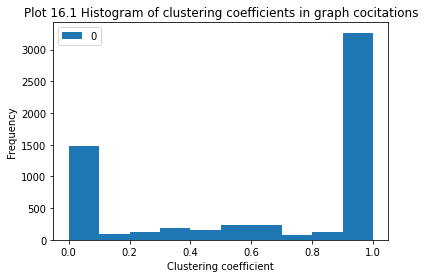

In [48]:
ax = pandas.DataFrame(data=networkx.clustering(cocitation_graph).values()).plot.hist()
ax.set_title("Plot 16.1 Histogram of clustering coefficients in graph cocitations")
ax.set_xlabel("Clustering coefficient")

Calculate k-cliques. K = 3

In [50]:
from networkx.algorithms.community.kclique import k_clique_communities

In [54]:
communities_in_cocitation_gen = k_clique_communities(cocitation_graph, 3)

In [55]:
communities_in_cocitation = []
for community in communities_in_cocitation_gen:
    communities_in_cocitation.append(community)

In [57]:
len(communities_in_cocitation)

943

Text(0.5, 0, 'Group size')

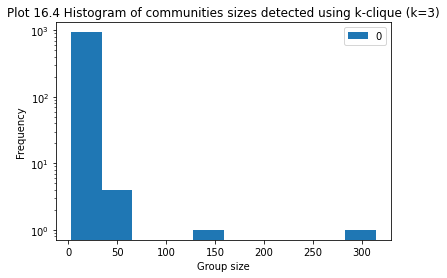

In [128]:
sizes_of_communites = [len(community) for community in communities_in_cocitation]
ax = pandas.DataFrame(sizes_of_communites).plot.hist()
plt.yscale('log')
ax.set_title("Plot 16.4 Histogram of communities sizes detected using k-clique (k=3)")
ax.set_xlabel("Group size")

In [129]:
communities_graph = networkx.Graph()
for index, community in enumerate(communities_in_cocitation):
    for other_index, other_community in enumerate(communities_in_cocitation[(index + 1):]):
        if community.intersection(other_community):
            label = str(index) + "_" + str(other_index)
            communities_graph.add_edge(index, other_index + index)

Text(0.5, 1.0, 'Plot 16.2 Co-citation communities (k-clique, k = 3) graph \n Edge is present if two communities has common member')

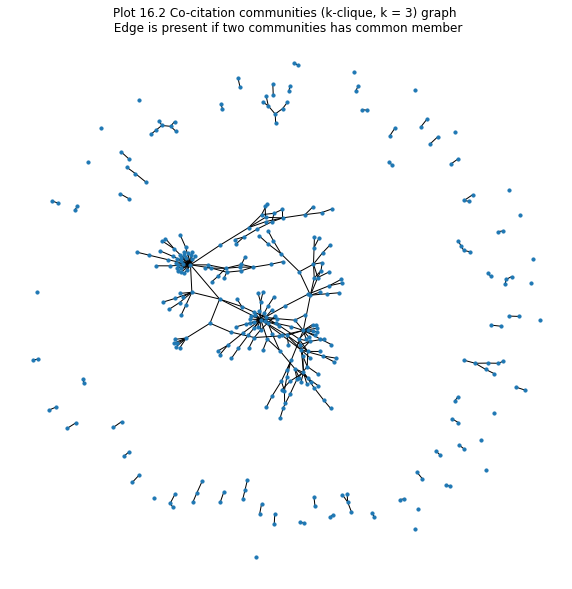

In [130]:
fig, ax = plt.subplots(figsize=(10, 10))
networkx.draw(communities_graph, node_size=10)
ax.set_title("Plot 16.2 Co-citation communities (k-clique, k = 3) graph \n Edge is present if two communities has common member")

Above graph can be interpreted as follows:
 - separate groups- groups not interacted recetly with others
 - nodes with high degree- interdisciplinary groups or groups which intensively synthesis others papers 

In [88]:
community_components_gen = networkx.connected_components(communities_graph)

In [89]:
community_components = [community_component for community_component in community_components_gen]

In [94]:
largest_cc = max(community_components, key=len)

Text(0.5, 1.0, 'Plot 16.3 Largest connected component in communities graph')

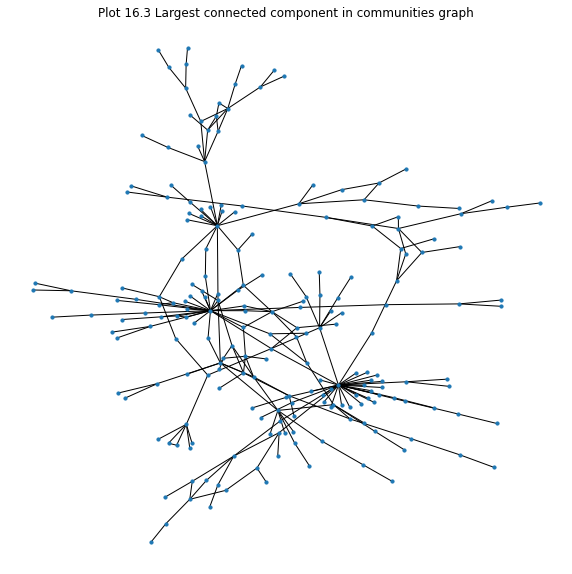

In [125]:
fig, ax = plt.subplots(figsize=(10, 10))
networkx.draw(communities_graph, nodelist=list(largest_cc), node_size=10)
ax.set_title("Plot 16.3 Largest connected component in communities graph")

In [123]:
sorted_list = list(networkx.degree(communities_graph))
sorted_list.sort(key=lambda x: x[1], reverse=True)

## Simple metrics for citation and co-citation graph

### Degree

In [126]:
cocitation_graph

In [141]:
degree_cg = networkx.degree(cocitation_graph)

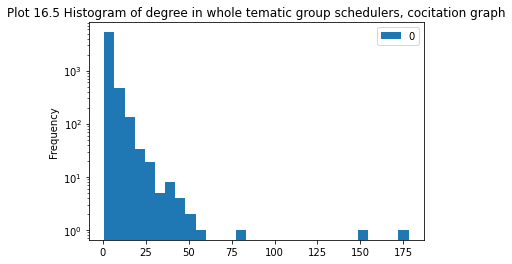

In [142]:
ax= pandas.DataFrame(dict(degree_cg).values()).plot.hist(bins=30)
ax.set_title("Plot 16.5 Histogram of degree in whole tematic group schedulers, cocitation graph")
plt.yscale('log')

In [180]:
sorted_degree_ccg = list(degree_cg)
sorted_degree_ccg.sort(key=lambda x: x[1], reverse=True)
top10_degree_ccg = sorted_degree_ccg[:10]

In [181]:
for (author_id, dgr) in top10_degree_ccg:
    print(get_author_data(author_id))

{'name': 'Robert I. Davis', 'id': '2123337776', 'org': 'University of York, York, UK'}
{'name': 'Alan Burns', 'id': '2344101015', 'org': 'Real-time Systems Research Group, Department of Computer Science, University of York, UK#TAB#'}
{'name': 'Sanjoy K. Baruah', 'id': '2145728887', 'org': 'Department of Electrical Engineering and Computer Science, The University of Vermont, Burlington, VT 05405, USA'}
{'name': 'Keqin Li', 'id': '2131215675', 'org': 'Coll. of Inf. Sci. & Eng., Hunan Univ., Changsha, China'}
{'name': 'James H. Anderson', 'id': '2113290946', 'org': 'Department of Computer Science, University of North Carolina at Chapel Hill, Chapel Hill, USA#TAB#'}
{'name': 'Marko Bertogna', 'id': '2014446980'}
{'name': 'Insik Shin', 'id': '2098336271', 'org': 'KAIST, South Korea'}
{'name': 'Dakai Zhu', 'id': '2154569489', 'org': 'Dept. of Comput. Sci., Univ. of Texas at San Antonio, San Antonio, TX, USA'}
{'name': 'Jinkyu Lee', 'id': '2228445708', 'org': 'Dept. of Electr. Eng. & Comput. 

Interpretation: Nodes with highes co-citation with other authors. Just very active authors, in theirs field of studies

In [153]:
indegree = citation_graph.in_degree

Interpretation: a->b if a cite b, so nodes with higher in-degree is the most cited

Text(0.5, 1.0, 'Plot 16.6 Histogram of in degree values for citations (a->b if a cite b)')

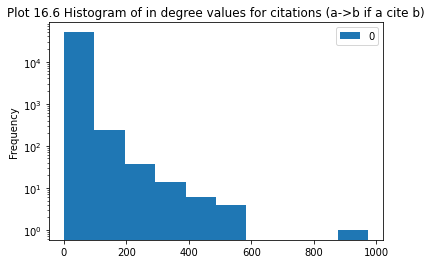

In [156]:
ax = pandas.DataFrame(dict(indegree).values()).plot.hist()
plt.yscale('log')
ax.set_title("Plot 16.6 Histogram of in degree values for citations (a->b if a cite b)")

In [157]:
sorted_in_degree_citation_graph = list(indegree)
sorted_in_degree_citation_graph.sort(key=lambda x: x[1], reverse=True)

In [159]:
top10 = sorted_in_degree_citation_graph[:10]

In [178]:
for (author_id, ind) in top10:
    print(get_author_data(author_id))

{'name': 'Rajkumar Buyya', 'id': '737083156', 'org': 'University of Melbourne, Australia'}
{'name': 'Ion Stoica', 'id': '2161479384', 'org': 'U.C. Berkeley'}
{'name': 'Rodrigo N. Calheiros', 'id': '2081216724', 'org': 'The University of Melbourne'}
{'name': 'Anton Beloglazov', 'id': '2061447099', 'org': 'The University of Melbourne, Australia'}
{'name': 'Albert Y. Zomaya', 'id': '698114488', 'org': 'Centre for Distributed and High Performance Computing, School of Information Technologies, The University of Sydney, NSW 2006, Australia and NICTA, Australian Technology Park, Eveleigh, NSW 2015, ...#TAB#'}
{'name': 'Robert I. Davis', 'id': '2123337776', 'org': 'University of York, York, UK'}
{'name': 'Scott Shenker', 'id': '719828399', 'org': 'ICSI'}
{'name': 'Alan Burns', 'id': '2344101015', 'org': 'Real-time Systems Research Group, Department of Computer Science, University of York, UK#TAB#'}
{'name': 'Matei Zaharia', 'id': '2009645378', 'org': 'MIT and Databricks, San Francisco, CA#TAB#

In [207]:
def hist_and_top_10(function, data, hist_title):
    res = function(data)
    ax = pandas.DataFrame(dict(res).values()).plot.hist(bins=30)
    ax.set_title(hist_title)
    plt.yscale('log')
    sorted_res = list(res.items())
    sorted_res.sort(key=lambda x: x[1], reverse=True)
    top10 = sorted_res[:10]
    for (author_id, ind) in top10:
        print(get_author_data(author_id))

{'name': 'Keqin Li', 'id': '2131215675', 'org': 'Coll. of Inf. Sci. & Eng., Hunan Univ., Changsha, China'}
{'name': 'Florin Pop', 'id': '2303552343'}
{'name': 'Laurence T. Yang', 'id': '2145586806', 'org': 'Sch. of Comput. Sci. & Technol., Huazhong Univ. of Sci. & Technol., Wuhan, China'}
{'name': 'Robert I. Davis', 'id': '2123337776', 'org': 'University of York, York, UK'}
{'name': 'Kenli Li', 'id': '2137759557', 'org': 'School of Information Science and Engineering, Hunan University, Chang Sha, China'}
{'name': 'Alan Burns', 'id': '2344101015', 'org': 'Real-time Systems Research Group, Department of Computer Science, University of York, UK#TAB#'}
{'name': 'Xiaomin Zhu', 'id': '2307065575'}
{'name': 'Samee Ullah Khan', 'id': '2101747962'}
{'name': 'Rajkumar Buyya', 'id': '737083156', 'org': 'University of Melbourne, Australia'}
{'name': 'Ali Allahverdi', 'id': '423755632', 'org': 'Department of Industrial and Management Systems Engineering, Kuwait University, P.O. Box 5969, Safat, Kuw

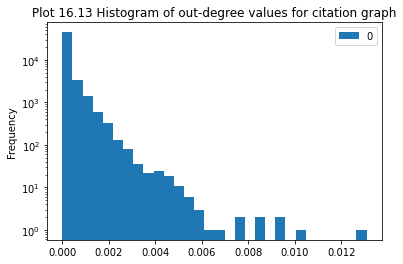

In [208]:
hist_and_top_10(networkx.out_degree_centrality, citation_graph, "Plot 16.13 Histogram of out-degree values for citation graph")

### Betweenness

{'name': 'Keqin Li', 'id': '2131215675', 'org': 'Coll. of Inf. Sci. & Eng., Hunan Univ., Changsha, China'}
{'name': 'Lothar Thiele', 'id': '2156635946', 'org': 'ETH Zurich, Switzerland'}
{'name': 'Rajkumar Buyya', 'id': '737083156', 'org': 'University of Melbourne, Australia'}
{'name': 'Laurence T. Yang', 'id': '2145586806', 'org': 'Sch. of Comput. Sci. & Technol., Huazhong Univ. of Sci. & Technol., Wuhan, China'}
{'name': 'Chuang Lin', 'id': '2126090014', 'org': 'Tsinghua University, Beijing 100084, China'}
{'name': 'Rami Bahsoon', 'id': '274809085', 'org': 'School of Computer Science, The University of Birmingham, United Kingdom, B15 2TT'}
{'name': 'Robert I. Davis', 'id': '2123337776', 'org': 'University of York, York, UK'}
{'name': 'Maryline Chetto', 'id': '101319827', 'org': 'IRCCyN, Univ. of Nantes, Nantes, France'}
{'name': 'Kenli Li', 'id': '2137759557', 'org': 'School of Information Science and Engineering, Hunan University, Chang Sha, China'}
{'name': 'Mohamed Khalgui', 'id':

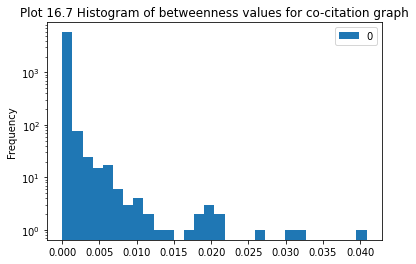

In [209]:
hist_and_top_10(networkx.betweenness_centrality, cocitation_graph, "Plot 16.7 Histogram of betweenness values for co-citation graph")

In [210]:
hist_and_top_10(networkx.betweenness_centrality, citation_graph, "Plot 16.8 Histogram of betweenness values for citation graph")

KeyboardInterrupt: 

### Closeness

In [211]:
hist_and_top_10(networkx.closeness.closeness_centrality, cocitation_graph, "Plot 16.9 Histogram of closeness values for co-citation graph")

KeyboardInterrupt: 

In [ ]:
hist_and_top_10(networkx.closeness.closeness_centrality, citation_graph, "Plot 16.10 Histogram of closeness values for citation graph")

### Clustering

{'name': 'Alberto Vergnano', 'id': '2018630720', 'org': 'Department of Mechanical and Civil Engineering, University of Modena and Reggio Emilia, Italy'}
{'name': 'Claes Breitholtz', 'id': '2110313117', 'org': 'Chalmers University of Technology, Göteborg, Sweden'}
{'name': 'Bo Yu', 'id': '2118390767', 'org': 'Dept. of Electr. & Comput. Eng., Colorado State Univ., Fort Collins, CO, USA'}
{'name': 'Sayandev Mukherjee', 'id': '2781037445', 'org': 'DOCOMO Innovations, Inc., Palo Alto, CA 94304'}
{'name': 'Hiroyuki Ishii', 'id': '2126754882', 'org': 'NTT DOCOMO, Inc., Tokyo, Japan'}
{'name': 'Omid Semiari', 'id': '2807214924', 'org': 'Wireless@VT, Bradley Department of Electrical and Computer Engineering, Virginia Tech, Blacksburg, USA'}
{'name': 'Walid Saad', 'id': '2696869083', 'org': 'University of Miami'}
{'name': 'Frederick Vook', 'id': '1271690326', 'org': 'Nokia Networks'}
{'name': 'Xiang Cheng', 'id': '2146109574', 'org': 'Sch. of Electron. Eng. & Comput. Sci., Peking Univ., Beijing,

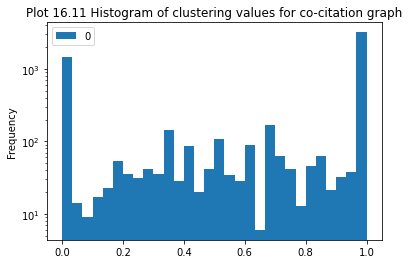

In [212]:
hist_and_top_10(networkx.clustering, cocitation_graph, "Plot 16.11 Histogram of clustering values for co-citation graph")

{'name': 'V. Kaviha', 'id': '2283559556'}
{'name': 'V. Kannan', 'id': '2479356268'}
{'name': 'S. Ravi', 'id': '2892597754'}
{'name': 'Xiaodong Liu', 'id': '2599674306', 'org': 'The Research Center of Information and Control, Dalian University of Technology, Dalian, China 116024'}
{'name': 'James A. Rodger', 'id': '2134323721', 'org': 'Indiana University of Pennsylvania, PA'}
{'name': 'Wei Huang', 'id': '2620156637', 'org': 'School of Computer and Communication Engineering, Tianjin University of Technology, Tianjin 300384, China#TAB#'}
{'name': 'Xianchang Wang', 'id': '2474339028', 'org': 'School of Sciences, Dalian Ocean University, Dalian 116023, PR China#TAB#'}
{'name': 'Piotr Palka', 'id': '2764692919'}
{'name': 'Valeria Petrini', 'id': '2235557950', 'org': 'Fondazione Ugo Bordoni (FUB), Italy'}
{'name': 'Marina Barbiroli', 'id': '2893263283', 'org': "Department of Electronics, Computer Sciences and Systems of Bologna's University Italy"}


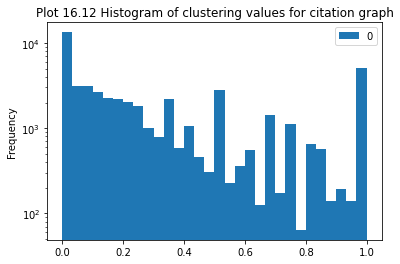

In [213]:
hist_and_top_10(networkx.clustering, citation_graph, "Plot 16.12 Histogram of clustering values for citation graph")

## Year by year analysis for schedulers group

In [217]:
def create_citation_graph(dataframe):
    citation_dict = {}
    def fill_graph(row, graph):
        authors = list(row["authors"])
        references_authors = list(row["author_references"])
        for author in list(authors):
            for reference_author in references_authors:
                edge_name = str(author["index"]) + "_" + str(reference_author)
                weight = graph.get(edge_name, 0)
                graph[edge_name] = weight + 1

    dataframe.apply(lambda row: fill_graph(row, citation_dict), axis=1)
    citation_graph = networkx.DiGraph()
    for edge in citation_dict.keys():
        nodes = edge.split("_")
        node_x = int(nodes[0])
        node_y = int(nodes[1])
        weight = int(citation_dict[edge])
        citation_graph.add_edge(node_x, node_y, weight = weight)
    return citation_graph

In [216]:
def get_co_citation_graph(citation_graph):
    bidirectional_nodes = get_bidirectional_nodes(citation_graph)
    cocitation_graph = networkx.Graph()
    for node, neighbours in bidirectional_nodes.items():
        for neighbour in neighbours:
            cocitation_graph.add_edge(node, neighbour)
    return cocitation_graph

In [223]:
def get_articles_from(main_dataset, year):
    return main_dataset.loc[main_dataset["year"] == year]

In [231]:
def perform_analysis_for(main_df, function, years):
    results_citations = []
    results_cocitations = []
    for year in years:
        print(year)
        df = get_articles_from(main_df, year)
        citation_graph = create_citation_graph(df)
        cocitation_graph = get_co_citation_graph(citation_graph)
        results_citations.append(function(citation_graph))
        results_cocitations.append(function(cocitation_graph))
    return (results_citations, results_cocitations)
    

In [294]:
def get_top(function):
    def top_function(data):
        res = function(data)
        sorted_res = list(res.items())
        sorted_res.sort(key=lambda x: x[1], reverse=True)
        return sorted_res
    return top_function

In [233]:
(citations_res, cocitations_res) = perform_analysis_for(filtered_slice, get_top_10(networkx.betweenness_centrality), range(2011, 2018))

2011
2012
2013


KeyboardInterrupt: 

In [295]:
res1 = []
for function in [networkx.clustering, networkx.closeness.closeness_centrality]:
    (citations_res, cocitations_res) = perform_analysis_for(filtered_slice, get_top(function), range(2011, 2018))
    res1.append((citations_res, cocitations_res))

2011
2012
2013
2014
2015
2016
2017
2011
2012
2013
2014
2015
2016
2017


In [305]:
def add_year(dataset):
    dataset_with_year_as_tuple = [(year, dataset[index]) for index, year in enumerate(range(2011, 2018))]
    dataset_with_year = []
    for data_list in [[(year, index, coef) for index, coef in data] for year, data in dataset_with_year_as_tuple]:
        for data in data_list:
            dataset_with_year.append(data)
    return dataset_with_year

In [296]:
for (citation_res, cocitation_res) in res1:
    citation_with_year = add_year(citation_res)
    cocitation_with_year = add_year(cocitation_res)
    citation_df = pandas.DataFrame(citation_with_year)
    cocitation_df = pandas.DataFrame(cocitation_with_year)
    

In [297]:
(citation_b, cocitation_b) = betweenness_res

In [298]:
citation_b_with_year_as_tuple = [(year, citation_b[index]) for index, year in enumerate(range(2011, 2018))]

In [299]:
citation_b_with_year = []
for data_list in [[(year, index, coef) for index, coef in data] for year, data in citation_b_with_year_as_tuple]:
    for data in data_list:
        citation_b_with_year.append(data)

In [300]:
citation_df = pandas.DataFrame(citation_b_with_year)

In [304]:
len(citation_df[1].unique())

50668

In [291]:
citation_df

,0,1,2
0,2011,27764,0.000197
1,2011,8155,0.000145
2,2011,103857,0.000115
3,2011,369655,0.000115
4,2011,8019,0.000095
...,...,...,...
65,2017,21192,0.004610
66,2017,103857,0.004252
67,2017,40615,0.002997
68,2017,10276,0.002795


In [164]:
import json
authors_index_to_id = {}
with open('authors_index_to_id.json') as json_file:
    authors_index_to_id = json.load(json_file)

In [165]:
authors_id_name_map = {}
with open('authors_id__name_map.json') as json_file:
    authors_id_name_map = json.load(json_file)


In [173]:
def get_author_data(index):
    id_a = authors_index_to_id[str(index)]
    return authors_id_name_map[id_a]

In [174]:
get_author_data(1001)

{'name': 'Emad M. Boctor',
 'id': '2310477595',
 'org': 'Dept. of Radiology, Johns Hopkins Medical Institutions, Baltimore, MD, USA'}

In [177]:
for (author_id, ind) in top10:
    print(get_author_data(author_id))

{'name': 'Rajkumar Buyya', 'id': '737083156', 'org': 'University of Melbourne, Australia'}
{'name': 'Ion Stoica', 'id': '2161479384', 'org': 'U.C. Berkeley'}
{'name': 'Rodrigo N. Calheiros', 'id': '2081216724', 'org': 'The University of Melbourne'}
{'name': 'Anton Beloglazov', 'id': '2061447099', 'org': 'The University of Melbourne, Australia'}
{'name': 'Albert Y. Zomaya', 'id': '698114488', 'org': 'Centre for Distributed and High Performance Computing, School of Information Technologies, The University of Sydney, NSW 2006, Australia and NICTA, Australian Technology Park, Eveleigh, NSW 2015, ...#TAB#'}
{'name': 'Robert I. Davis', 'id': '2123337776', 'org': 'University of York, York, UK'}
{'name': 'Scott Shenker', 'id': '719828399', 'org': 'ICSI'}
{'name': 'Alan Burns', 'id': '2344101015', 'org': 'Real-time Systems Research Group, Department of Computer Science, University of York, UK#TAB#'}
{'name': 'Matei Zaharia', 'id': '2009645378', 'org': 'MIT and Databricks, San Francisco, CA#TAB#

In [ ]:
for (author_id, ind) in top10:
    print(get_author_data(author_id))